# The TwoPlus Earbuds Problem


The Monte Carlo simulation can be used to generate a range of possible demand scenarios, based on the estimated demand distribution. Each scenario can then be used to calculate the corresponding profit or cost associated with different inventory levels. By repeating this process many times, a probability distribution of potential profits or costs can be obtained.

The Newsvendor Model can then be used to determine the optimal inventory level that maximizes expected profit, based on the probability distribution of potential profits or costs generated by the Monte Carlo simulation.

To use the Monte Carlo simulation with the Newsvendor Model, you would typically follow these steps:

1. Estimate the probability distribution of demand for the product.

2. Determine the selling price and cost of the product.

3. Determine the salvage value of any unsold inventory.

4. Use the Monte Carlo simulation to generate a range of possible demand scenarios.

5. For each demand scenario, calculate the corresponding profit or cost associated with different inventory levels.

6. Repeat step 5 for many demand scenarios, to obtain a probability distribution of potential profits or costs.

7. Use the Newsvendor Model to determine the optimal inventory level that maximizes expected profit, based on the probability distribution of potential profits or costs obtained from the Monte Carlo simulation.

By combining the Monte Carlo simulation with the Newsvendor Model, businesses can make more informed decisions about inventory levels, taking into account the uncertainty and variability of demand.

#### Import Requried Libraries

In [3]:
import numpy as np
import matplotlib as plt
import random
from numpy.random import normal

#### Creating a Class for the Monte Carlo Simulation

In [84]:
""" 
Step 1 - Input Parameters:
You can access and adjust the parameters here when applying the simulation to different scenarios.
"""

class ProfitStimulation:
    
    def __init__(self, _simul):
        self.simul = _simul
        self.mean = 150
        self.dev = 20
        self.size = 1000
        self.unit_price = 28.50
        self.retail_price = 150.00
        self.cost_of_disposing = 8.50
        self.start = 110
        self.end = 190

    """ 
    Step 2 - Define the profit formula:
    Let x represent the production quantity, and let i represent the simulated demand. 
    """

    def profitFormula(self, x, i):
        if i > x:
            profit = ( x * (self.retail_price - self.unit_price)) - ((i-x) * (self.unit_price + self.cost_of_disposing))
            return profit
        else:
            profit = i * (self.retail_price - self.unit_price)
            return profit
    
    """ 
    Step 3 -  Generate random demand and iterate through the demand list, 
    and calculates the average at a specific manufacture level.
    """

    def find_project(self, i):
        data = normal(loc=self.mean, scale=self.dev, size=self.size)
        rand_list=data.round(decimals=0, out=None).tolist()
        profit_list = [self.profitFormula(each, i) for each in rand_list]
        result = round(np.mean(profit_list),3)
        return result
    
    """
    Outputs a recommendation to the user as well as a scatterplot after running a specifed range of simulations
    """

    def loop_manufactured(self):
        data = [[self.find_project(i), i] for i in range(self.start, self.end)]
        data = sorted(data, key=lambda x: x[0], reverse=True)
        result = (data[0][1], data[0][0])
        
        x_manufacture_level = [i[1] for i in data]
        y_profit = [i[0] for i in data]
        plt.title("Manufacturing Level Simulation", loc='left', fontsize=20)
        plt.xlabel('Manufacture Level')
        plt.ylabel('Profit')
        plt.xticks(np.arange(min(x_manufacture_level), max(x_manufacture_level)+1, 10.0))
        sctr = plt.scatter(x_manufacture_level, y_profit, c=y_profit, cmap='RdYlBu')
        plt.colorbar(sctr, format='$%d')
        plt.grid()
        plt.show()
        
        print("Optimal Production Units: {}, Maximized Profit: ${}".format(result[0], result[1]))
        return result

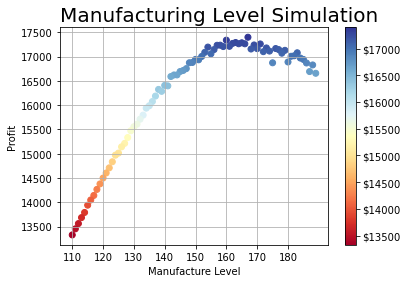

Optimal Production Units: 167, Maximized Profit: $17397.4


(167, 17397.4)

In [106]:
simul = 1000
ps = ProfitStimulation(1000)
ps.loop_manufactured()